In [20]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import glob
import nibabel as nib
import warnings
from tqdm import tqdm
import time
from pprint import pprint
from scipy.stats import sem
warnings.filterwarnings('ignore')
import pickle

import glmsingle
from glmsingle.glmsingle import GLM_single

In [21]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import glob
import nibabel as nib
import warnings
from tqdm import tqdm
import time
from pprint import pprint
from scipy.stats import sem
warnings.filterwarnings('ignore')
import pickle

import glmsingle
from glmsingle.glmsingle import GLM_single

# Helper Functions
* trialDM: Create a design matrix based off trial design csv

In [22]:
def get_designfilenames(sub_dir, wlsubj, exceptions = [], key = 'Trial'):
    design_filenames = glob.glob(os.path.join(sub_dir, "sub-wlsubj%03d/*design%s*" % (wlsubj, key)))
    designs = []
    
    for i, d in enumerate(design_filenames):
        if i not in exceptions:
            designs.append(d)
    
    designs.sort()
    
    return designs
    

def designMatrix(design_filename, n_TR, trial_dur, initial_delay = 10, plot = False, save = True):
    d = pd.read_csv(design_filename, sep = '\t')
    conds = np.unique(d.gratingAng)
    conds.sort()

    n_pos = len(conds)
    n_conds = n_pos * 2

    D = np.zeros([n_TR, n_conds])
    run_time = initial_delay

    for i, trial in d.iterrows():
        ang = trial.gratingAng
        iti = trial.ITIDur

        row = int(run_time)
        if trial.saccadeType == 'Saccade':
            col = np.where(ang == conds)[0][0]
        else: 
            col = np.where(ang == conds)[0][0] + n_pos

        run_time += trial_dur + iti

        D[row, col] = 1

    if plot:
        plt.imshow(D,aspect='auto',interpolation='none')
        plt.gcf().set_size_inches(10, 10)
        
    if save:
        save_path = '../designs/%s/' % design_filename.split('/')[-2]
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        
        filename = design_filename.split('/')[-1].split('designTrial.tsv')[0] + 'design.npy'
        np.save(os.path.join(save_path, filename), D)
        
    return D


def get_funcfilenames(sub_dir, wlsubj, session, save = True):
    datafiles = glob.glob(os.path.join(sub_dir, "sub-wlsubj%03d/ses-%s/func/sub-wlsubj%03d*mgz" % (wlsubj, session, wlsubj)))
    datafiles.sort()
    
    return datafiles
    

def load_hemidata(filenames, save = True):
    data = []
    for i, filename in enumerate(filenames):
        print('Nib. Loading:\n\t', filename)
        scan = nib.load(filename)
        print(filename, '\n\t', scan.shape)
        
        if i % 2:
            data[int(i/2)] = np.concatenate([data[int(i/2)], scan.get_fdata()])
            
            if save:
                subj_id = filename.split('/')[-4]
                prefix = filename.split('/')[-1].split('space')[0]
                
                save_path = '../voxels/%s/' % subj_id
                
                if not os.path.exists(save_path):
                    os.makedirs(save_path)

                save_name = prefix + 'hemi-both.npy'
                np.save(os.path.join(save_path, save_name), data[int(i/2)])
                print('Saved to: %s' % save_name)

        else:
            data.append(scan.get_fdata())
    
    return data

    

In [25]:
design_dir = '/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/'
sub_dir = design_dir
wlsubj = 139
key = 'Trial'
design_filenames = glob.glob(os.path.join(sub_dir, "sub-wlsubj%03d/*design%s*" % (wlsubj, key)))


In [48]:
 files = ['sub-wlsubj139_run-01_perception_07-16-22_14-25_trialdesign.tsv',
 'sub-wlsubj139_run-02_ltm_07-16-22_14-33_trialdesign.tsv',
 'sub-wlsubj139_run-03_wm_07-16-22_14-39_trialdesign.tsv',
 'sub-wlsubj139_run-04_perception_07-16-22_14-45_trialdesign.tsv',
 'sub-wlsubj139_run-05_ltm_07-16-22_14-50_trialdesign.tsv',
 'sub-wlsubj139_run-06_wm_07-16-22_14-56_trialdesign.tsv']

In [49]:
files

['sub-wlsubj139_run-01_perception_07-16-22_14-25_trialdesign.tsv',
 'sub-wlsubj139_run-02_ltm_07-16-22_14-32_trialdesign.tsv',
 'sub-wlsubj139_run-02_ltm_07-16-22_14-33_trialdesign.tsv',
 'sub-wlsubj139_run-03_wm_07-16-22_14-39_trialdesign.tsv',
 'sub-wlsubj139_run-04_perception_07-16-22_14-45_trialdesign.tsv',
 'sub-wlsubj139_run-05_ltm_07-16-22_14-50_trialdesign.tsv',
 'sub-wlsubj139_run-06_wm_07-16-22_14-56_trialdesign.tsv']

In [43]:
design_files = glob.glob(os.path.join(sub_dir, "sub-wlsubj%03d/*run-0[1-6]*.tsv" % wlsubj))

In [58]:

design_dir = '~/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/'

design_filenames = [
    'sub-wlsubj139_run-01_perception_07-16-22_14-25_trialdesign.tsv',
    'sub-wlsubj139_run-02_ltm_07-16-22_14-33_trialdesign.tsv',
    'sub-wlsubj139_run-03_wm_07-16-22_14-39_trialdesign.tsv',
    'sub-wlsubj139_run-04_perception_07-16-22_14-45_trialdesign.tsv',
    'sub-wlsubj139_run-05_ltm_07-16-22_14-50_trialdesign.tsv',
    'sub-wlsubj139_run-06_wm_07-16-22_14-56_trialdesign.tsv'
]

In [59]:
    design_dir = os.path.expanduser(design_dir)
    design_filepaths = [os.path.join(design_dir, "sub-wlsubj%03d" % wlsubj, filename) for filename in design_filenames]
    design_filepaths.sort()
    design_filepaths

['/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/sub-wlsubj139/sub-wlsubj139_run-01_perception_07-16-22_14-25_trialdesign.tsv',
 '/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/sub-wlsubj139/sub-wlsubj139_run-02_ltm_07-16-22_14-33_trialdesign.tsv',
 '/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/sub-wlsubj139/sub-wlsubj139_run-03_wm_07-16-22_14-39_trialdesign.tsv',
 '/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/sub-wlsubj139/sub-wlsubj139_run-04_perception_07-16-22_14-45_trialdesign.tsv',
 '/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/sub-wlsubj139/sub-wlsubj139_run-05_ltm_07-16-22_14-50_trialdesign.tsv',
 '/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/sub-wlsubj139/sub-wlsubj139_run-06_wm_07-16-22_14-56_trialdesign.tsv']

In [66]:
conds = []
itis = []
for d in design_filepaths:
    conds.append(pd.read_csv(d, sep = '\t').cond.values)
    itis.append(pd.read_csv(d, sep = '\t').ITIDur.values)
    
conds = np.asarray(conds)
itis = np.asarray(itis)

[array([10, 13,  5,  2, 14,  3,  0,  8,  9, 15,  4,  1,  7, 11,  6, 12]),
 array([19, 18, 24, 22, 27, 16, 23, 28, 21, 25, 20, 30, 29, 31, 26, 17]),
 array([42, 39, 44, 43, 32, 33, 41, 37, 35, 34, 38, 47, 45, 46, 36, 40]),
 array([14, 11,  4,  1,  8, 15, 12, 10,  3, 13,  7,  6,  2,  0,  9,  5]),
 array([28, 27, 31, 22, 26, 16, 25, 21, 18, 20, 29, 19, 23, 17, 24, 30]),
 array([44, 33, 36, 43, 38, 39, 35, 32, 47, 46, 45, 42, 40, 41, 37, 34])]

In [67]:
itis

[array([2500, 4500, 4500, 3500, 3500, 5500, 5500, 2500, 4500, 2500, 2500,
        3500, 5500, 3500, 5500, 4500]),
 array([2500, 2500, 2500, 5500, 4500, 4500, 5500, 2500, 3500, 3500, 4500,
        4500, 3500, 3500, 5500, 5500]),
 array([5500, 3500, 2500, 5500, 4500, 2500, 5500, 2500, 5500, 3500, 3500,
        3500, 4500, 4500, 2500, 4500]),
 array([4500, 3500, 3500, 4500, 3500, 5500, 5500, 2500, 5500, 4500, 2500,
        4500, 2500, 3500, 5500, 2500]),
 array([2500, 5500, 2500, 5500, 4500, 3500, 4500, 4500, 2500, 5500, 3500,
        2500, 5500, 3500, 4500, 3500]),
 array([5500, 2500, 3500, 3500, 2500, 2500, 4500, 2500, 3500, 4500, 5500,
        3500, 5500, 5500, 4500, 4500])]

In [69]:
np.asarray(conds).shape

(6, 16)

In [78]:
for i in itis: print(i.shape)

(16,)
(16,)
(16,)
(16,)
(16,)
(16,)


In [90]:
17*16

272

In [93]:
cue+delay+sacc + np.mean(itis)/1000

17.0

In [113]:
def generateDesignMatrix(design_filepath, n_TR, n_conds):
    pre_scan_delay = 10
    cue = 0.5
    delay = 11.5
    sacc = 1
    trial_dur = cue+delay+sacc

    D = np.zeros([n_TR, n_conds])

    design = pd.read_csv(d, sep = '\t')
    run_time = pre_scan_delay

    for j, trial in design.iterrows():
        row = int(run_time)
        col = trial.cond

        run_time += trial_dur + int(trial.ITIDur/1000)

        D[row, col] = 1
            
    return(D)

In [118]:
    design = [generateDesignMatrix(d, n_TR, n_conds) for d in design_filepaths]

In [122]:
len(design)

6

In [117]:
generateDesignMatrix(design_filepaths[0], n_TR, n_conds)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
wlsubj = 114
sacc_dur = 1
stimdur = 11.5
trial_dur = sacc_dur + stimdur
n_TR = 280
tr = 1

design_dir = '/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/pilot/design/'

design_files = get_designfilenames(design_dir, 114, [1])

design = [designMatrix(d, n_TR, trial_dur) for d in design_files]


In [131]:
fmriprep_dir = '~/mnt/winawer/Projects/Interstellar/derivatives/fmriprep'
fmriprep_dir = os.path.expanduser(fmriprep_dir)
wlsubj = 114
session = 'nyu3t01'
funcs_filenames = get_funcfilenames(fmriprep_dir, wlsubj, 'nyu3t01')

#data = load_hemidata(funcs_filenames)

In [133]:
funcs_filenames

['/Users/rob/mnt/winawer/Projects/Interstellar/derivatives/fmriprep/sub-wlsubj114/ses-nyu3t01/func/sub-wlsubj114_ses-nyu3t01_task-intpilot_run-1_space-fsnative_hemi-L_bold.func.mgz',
 '/Users/rob/mnt/winawer/Projects/Interstellar/derivatives/fmriprep/sub-wlsubj114/ses-nyu3t01/func/sub-wlsubj114_ses-nyu3t01_task-intpilot_run-1_space-fsnative_hemi-R_bold.func.mgz',
 '/Users/rob/mnt/winawer/Projects/Interstellar/derivatives/fmriprep/sub-wlsubj114/ses-nyu3t01/func/sub-wlsubj114_ses-nyu3t01_task-intpilot_run-2_space-fsnative_hemi-L_bold.func.mgz',
 '/Users/rob/mnt/winawer/Projects/Interstellar/derivatives/fmriprep/sub-wlsubj114/ses-nyu3t01/func/sub-wlsubj114_ses-nyu3t01_task-intpilot_run-2_space-fsnative_hemi-R_bold.func.mgz',
 '/Users/rob/mnt/winawer/Projects/Interstellar/derivatives/fmriprep/sub-wlsubj114/ses-nyu3t01/func/sub-wlsubj114_ses-nyu3t01_task-intpilot_run-3_space-fsnative_hemi-L_bold.func.mgz',
 '/Users/rob/mnt/winawer/Projects/Interstellar/derivatives/fmriprep/sub-wlsubj114/ses

In [79]:
nblocks = np.sum(np.concatenate(design))

# print some relevant metadata
print(f'Data has {len(data)} runs\n')
print(f'There are {nblocks} total blocks in runs 1-%d\n' % len(data))
print(f'Shape of data from each run is: {data[0].shape}\n')
print(f'XYZ dimensionality is: {data[0].shape[:3]} (one slice only)\n')
print(f'N = {data[0].shape[3]} TRs per run\n')
print(f'Numeric precision of data is: {type(data[0][0,0,0,0])}\n')
# print(f'There are {np.sum(FFA_roi)} voxels in the included FFA ROI\n')
# print(f'There are {np.sum(V1_roi)} voxels in the included V1 ROI')

Data has 8 runs

There are 128.0 total blocks in runs 1-8

Shape of data from each run is: (511173, 1, 1, 280)

XYZ dimensionality is: (511173, 1, 1) (one slice only)

N = 280 TRs per run

Numeric precision of data is: <class 'numpy.float64'>



In [9]:
# create a directory for saving GLMsingle outputs
outputdir_glmsingle = os.path.join('../GLMsingle', 'sub-wlsubj%03d' % wlsubj)

opt = dict()

# set important fields for completeness (but these would be enabled by default)
opt['wantlibrary'] = 1
opt['wantglmdenoise'] = 1
opt['wantfracridge'] = 1

# for the purpose of this example we will keep the relevant outputs in memory
# and also save them to the disk
opt['wantfileoutputs'] = [1,1,1,1]
opt['wantmemoryoutputs'] = [1,1,1,1]

# running python GLMsingle involves creating a GLM_single object
# and then running the procedure using the .fit() routine
glmsingle_obj = GLM_single(opt)

# visualize all the hyperparameters
pprint(glmsingle_obj.params)

{'R2thresh': 0,
 'brainR2': [],
 'brainexclude': False,
 'brainthresh': [99.0, 0.1],
 'chunklen': 50000,
 'extra_regressors': False,
 'fracs': array([1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
       0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05]),
 'hrffitmask': 1,
 'hrfmodel': 'optimise',
 'hrfthresh': 0.5,
 'lambda': 0,
 'n_boots': 100,
 'n_jobs': 1,
 'n_pcs': 10,
 'numforhrf': 50,
 'pcR2cutoff': [],
 'pcR2cutoffmask': 1,
 'pcstop': 1.05,
 'seed': 1654713640.143132,
 'suppressoutput': 0,
 'wantautoscale': 1,
 'wantfileoutputs': [1, 1, 1, 1],
 'wantfracridge': 1,
 'wantglmdenoise': 1,
 'wanthdf5': 0,
 'wantlibrary': 1,
 'wantlss': 0,
 'wantmemoryoutputs': [1, 1, 1, 1],
 'wantparametric': 0,
 'wantpercentbold': 1}


In [10]:
# this example saves output files to the folder  "example2outputs/GLMsingle"
# if these outputs don't already exist, we will perform the time-consuming call to GLMsingle;
# otherwise, we will just load from disk.
start_time = time.time()

if not os.path.exists(outputdir_glmsingle):

    print(f'running GLMsingle...')
    
    # run GLMsingle
    results_glmsingle = glmsingle_obj.fit(
       design,
       data,
       stimdur,
       tr,
       outputdir=outputdir_glmsingle)
    
    # we assign outputs of GLMsingle to the "results_glmsingle" variable.
    # note that results_glmsingle['typea'] contains GLM estimates from an ONOFF model,
    # where all images are treated as the same condition. these estimates
    # could be potentially used to find cortical areas that respond to
    # visual stimuli. we want to compare beta weights between conditions
    # therefore we are not going to include the ONOFF betas in any analyses of 
    # voxel reliability
    
else:
    print(f'loading existing GLMsingle outputs from directory:\n\t{outputdir_glmsingle}')
    
    # load existing file outputs if they exist
    results_glmsingle = dict()
    results_glmsingle['typea'] = np.load(os.path.join(outputdir_glmsingle,'TYPEA_ONOFF.npy'),allow_pickle=True).item()
    results_glmsingle['typeb'] = np.load(os.path.join(outputdir_glmsingle,'TYPEB_FITHRF.npy'),allow_pickle=True).item()
    results_glmsingle['typec'] = np.load(os.path.join(outputdir_glmsingle,'TYPEC_FITHRF_GLMDENOISE.npy'),allow_pickle=True).item()
    results_glmsingle['typed'] = np.load(os.path.join(outputdir_glmsingle,'TYPED_FITHRF_GLMDENOISE_RR.npy'),allow_pickle=True).item()

elapsed_time = time.time() - start_time

print(
    '\telapsed time: ',
    f'{time.strftime("%H:%M:%S", time.gmtime(elapsed_time))}'
)

loading existing GLMsingle outputs from directory:
	../GLMsingle/sub-wlsubj114
	elapsed time:  00:00:00


Analyzing top 100 voxels with largest beta weights by condition 3200


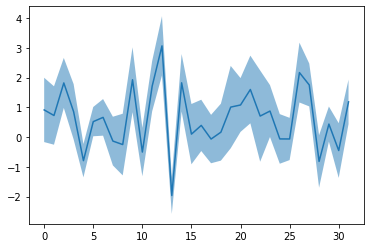

(3200, 16)
NOISE:  (320000, 16)


In [11]:
bs = results_glmsingle['typed']['betasmd']
split_betas = np.hsplit(bs.squeeze(), 4)
betas = np.mean(split_betas, axis = 0)
std_betas = np.std(split_betas, axis = 0)

n_conds = 32
n_permutations = 100

c = 1
k = 100
print("Analyzing top %d voxels with largest beta weights by condition" % k, k*32)
cb = []

betas[np.isnan(betas)] = 0

for c in range(betas.shape[-1]):
    cond_betas = betas[np.where(betas[:, c] == np.nanmax(betas[:, c]))].squeeze()
    cb.append(cond_betas)
    
cb = np.stack(cb, axis = 0)
underline = cb.mean(axis = 0) - sem(cb, axis = 0)
overline = cb.mean(axis = 0) + sem(cb, axis = 0)
plt.plot(cb.mean(axis = 0))
plt.fill_between(np.arange(betas.shape[-1]), overline, underline, alpha = 0.5)
plt.show()

cbmor = []
cbmsr = []
cbmnsr = []
for c in range(betas.shape[-1]):
    # idxs = np.where(betas[:, :, :, c] == np.nanmax(betas[:, :, :, c])
    cond_betas = betas[np.where(betas[:, c] == np.nanmax(betas[:, c]))].squeeze()
    cond_betas = betas[np.argpartition(betas[:, c], -k, axis = 0)[-k:].squeeze()].squeeze()
    # cbm = cond_betas - cb.mean(axis = 0)
    cbm = cond_betas
    
    cbm_s = cbm[:, :int(n_conds / 2)]
    cbm_ns = cbm[:, int(n_conds / 2):]
    cbm_o = (cbm_s + cbm_ns) / 2
    
    cbm_s_roll = np.roll(cbm_s, 7 - c)
    cbm_ns_roll = np.roll(cbm_ns, 7 - c)
    cbm_o_roll = np.roll(cbm_o, 7 - c)

    
    cbmor.append(cbm_o_roll)
    cbmsr.append(cbm_s_roll)
    cbmnsr.append(cbm_ns_roll)

    
cbmor = np.concatenate(cbmor, axis = 0)
cbmsr = np.concatenate(cbmsr, axis = 0)
cbmnsr = np.concatenate(cbmnsr, axis = 0)
print(cbmor.shape)

noise = []
for i in range(n_permutations):
    n = cbmor.copy().T
    np.random.shuffle(n)
    noise.append(n.T)
noise = np.concatenate(noise, axis = 0)
print("NOISE: ", noise.shape)


Text(0.5, 1.0, 'Difference between N.S. and S.')

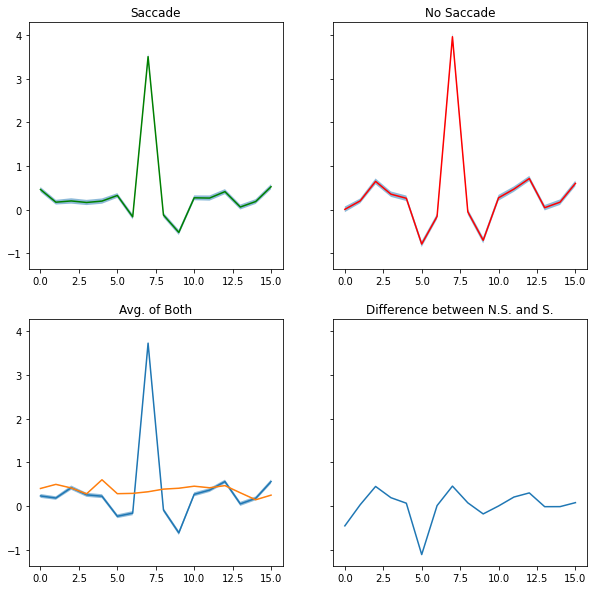

In [12]:
fig, axs = plt.subplots(2, 2, sharey = True, figsize = (10, 10))

underline = cbmsr.mean(axis = 0) - sem(cbmsr, axis = 0)
overline = cbmsr.mean(axis = 0) + sem(cbmsr, axis = 0)
axs[0, 0].plot(cbmsr.mean(axis = 0), color = 'green')
axs[0, 0].fill_between(np.arange(int(betas.shape[-1]/2)), overline, underline, alpha = 0.5)
axs[0, 0].set_title('Saccade')

underline = cbmnsr.mean(axis = 0) - sem(cbmnsr, axis = 0)
overline = cbmnsr.mean(axis = 0) + sem(cbmnsr, axis = 0)
axs[0, 1].plot(cbmnsr.mean(axis = 0), color = 'red')
axs[0, 1].fill_between(np.arange(int(betas.shape[-1]/2)), overline, underline, alpha = 0.5)
axs[0, 1].set_title('No Saccade')

underline = cbmor.mean(axis = 0) - sem(cbmor, axis = 0)
overline = cbmor.mean(axis = 0) + sem(cbmor, axis = 0)
axs[1, 0].plot(cbmor.mean(axis = 0))
axs[1, 0].fill_between(np.arange(int(betas.shape[-1]/2)), overline, underline, alpha = 0.5)
axs[1, 0].set_title('Avg. of Both')

underline = noise.mean(axis = 0) - sem(noise, axis = 0)
overline = noise.mean(axis = 0) + sem(noise, axis = 0)
axs[1, 0].plot(noise.mean(axis = 0))
axs[1, 0].fill_between(np.arange(int(betas.shape[-1]/2)), overline, underline, alpha = 0.5)


axs[1, 1].plot(cbmnsr.mean(axis = 0) - cbmsr.mean(axis = 0))
axs[1, 1].set_title('Difference between N.S. and S.')


Analyzing top 1000 voxels with largest beta weights by condition 32000


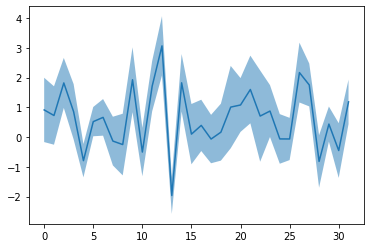

In [44]:
bs = results_glmsingle['typed']['betasmd']
split_betas = np.hsplit(bs.squeeze(), 4)
betas = np.mean(split_betas, axis = 0)
std_betas = np.std(split_betas, axis = 0)

n_conds = 32
n_permutations = 100

c = 1
k = 1000
print("Analyzing top %d voxels with largest beta weights by condition" % k, k*32)
cb = []

betas[np.isnan(betas)] = 0

for c in range(betas.shape[-1]):
    cond_betas = betas[np.where(betas[:, c] == np.nanmax(betas[:, c]))].squeeze()
    cb.append(cond_betas)
    
cb = np.stack(cb, axis = 0)
underline = cb.mean(axis = 0) - sem(cb, axis = 0)
overline = cb.mean(axis = 0) + sem(cb, axis = 0)
plt.plot(cb.mean(axis = 0))
plt.fill_between(np.arange(betas.shape[-1]), overline, underline, alpha = 0.5)
plt.show()

cbmor = []
cbmsr = []
cbmnsr = []
for c in range(betas.shape[-1]):
    # idxs = np.where(betas[:, :, :, c] == np.nanmax(betas[:, :, :, c])
    
    if c < (betas.shape[-1]/2):
        cond_betas = betas[np.argpartition(betas[:, int(c + 16)], -k, axis = 0)[-k:].squeeze()].squeeze()
        # cbm = cond_betas - cb.mean(axis = 0)
        cbm = cond_betas

        cbm_s = cbm[:, :int(n_conds / 2)]
        
    else:
        cond_betas = betas[np.argpartition(betas[:, int(c - 16)], -k, axis = 0)[-k:].squeeze()].squeeze()
        # cbm = cond_betas - cb.mean(axis = 0)
        cbm = cond_betas

        cbm_ns = cbm[:, :int(n_conds / 2)]
    
    cbm_s_roll = np.roll(cbm_s, 7 - c)
    cbm_ns_roll = np.roll(cbm_ns, 7 - c)

    cbmsr.append(cbm_s_roll)
    cbmnsr.append(cbm_ns_roll)

cbmsr = np.concatenate(cbmsr, axis = 0)
cbmnsr = np.concatenate(cbmnsr, axis = 0)


In [13]:
(betas.shape[-1]/2)

16.0

Text(0.5, 1.0, 'Difference between N.S. and S.')

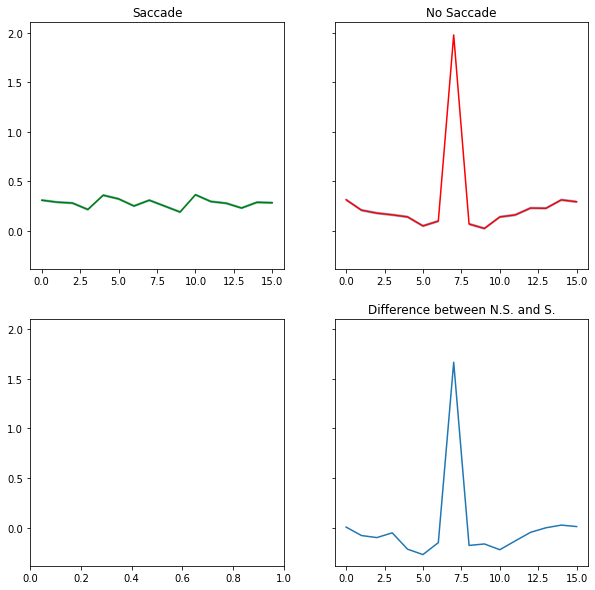

In [45]:
fig, axs = plt.subplots(2, 2, sharey = True, figsize = (10, 10))

underline = cbmsr.mean(axis = 0) - sem(cbmsr, axis = 0)
overline = cbmsr.mean(axis = 0) + sem(cbmsr, axis = 0)
axs[0, 0].plot(cbmsr.mean(axis = 0), color = 'green')
axs[0, 0].fill_between(np.arange(int(betas.shape[-1]/2)), overline, underline, alpha = 0.5)
axs[0, 0].set_title('Saccade')

underline = cbmnsr.mean(axis = 0) - sem(cbmnsr, axis = 0)
overline = cbmnsr.mean(axis = 0) + sem(cbmnsr, axis = 0)
axs[0, 1].plot(cbmnsr.mean(axis = 0), color = 'red')
axs[0, 1].fill_between(np.arange(int(betas.shape[-1]/2)), overline, underline, alpha = 0.5)
axs[0, 1].set_title('No Saccade')

axs[1, 1].plot(cbmnsr.mean(axis = 0) - cbmsr.mean(axis = 0))
axs[1, 1].set_title('Difference between N.S. and S.')


In [145]:
PARAMS = {
    '1-6': {
        'n_TR': 280,
        'n_conds': 48,
        'tr': 1,
        'sacc_dur': 1,
        'design_filenames': [
            'sub-wlsubj139_run-01_perception_07-16-22_14-25_trialdesign.tsv',
            'sub-wlsubj139_run-02_ltm_07-16-22_14-33_trialdesign.tsv',
            'sub-wlsubj139_run-03_wm_07-16-22_14-39_trialdesign.tsv',
            'sub-wlsubj139_run-04_perception_07-16-22_14-45_trialdesign.tsv',
            'sub-wlsubj139_run-05_ltm_07-16-22_14-50_trialdesign.tsv',
            'sub-wlsubj139_run-06_wm_07-16-22_14-56_trialdesign.tsv'
        ]       
    },
    
    '7-12': {
        'n_TR': 314,
        'n_conds': 48,
        'tr': 1,
        'sacc_dur': 1.5,
        'design_filenames': []
    }
}

In [163]:
d

'/Users/rob/mnt/winawer/Projects/Interstellar/task/Interstellar/main/design/sub-wlsubj139/sub-wlsubj139_run-06_wm_07-16-22_14-56_trialdesign.tsv'

In [181]:
np.asarray([pd.read_csv(d, sep = '\t').cond.values for d in design_filepaths]).flatten()

array([10, 13,  5,  2, 14,  3,  0,  8,  9, 15,  4,  1,  7, 11,  6, 12, 19,
       18, 24, 22, 27, 16, 23, 28, 21, 25, 20, 30, 29, 31, 26, 17, 42, 39,
       44, 43, 32, 33, 41, 37, 35, 34, 38, 47, 45, 46, 36, 40, 14, 11,  4,
        1,  8, 15, 12, 10,  3, 13,  7,  6,  2,  0,  9,  5, 28, 27, 31, 22,
       26, 16, 25, 21, 18, 20, 29, 19, 23, 17, 24, 30, 44, 33, 36, 43, 38,
       39, 35, 32, 47, 46, 45, 42, 40, 41, 37, 34])

In [180]:
np.asarray([pd.read_csv(d, sep = '\t').cond.values for d in design_filepaths])

array([[10, 13,  5,  2, 14,  3,  0,  8,  9, 15,  4,  1,  7, 11,  6, 12],
       [19, 18, 24, 22, 27, 16, 23, 28, 21, 25, 20, 30, 29, 31, 26, 17],
       [42, 39, 44, 43, 32, 33, 41, 37, 35, 34, 38, 47, 45, 46, 36, 40],
       [14, 11,  4,  1,  8, 15, 12, 10,  3, 13,  7,  6,  2,  0,  9,  5],
       [28, 27, 31, 22, 26, 16, 25, 21, 18, 20, 29, 19, 23, 17, 24, 30],
       [44, 33, 36, 43, 38, 39, 35, 32, 47, 46, 45, 42, 40, 41, 37, 34]])

##### 